# Исследование продаж компьютерных игр в интернет-магазине «Стримчик».

   Необходимо выявить определяющие успешность игры закономерности, нам доступны данные до 2016 года: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.         
   Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Общая информация. Предобработка данных.

In [56]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#откроем датасет и изучим общую информацию
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
#преобразуем данные в нужные типы
data['user_score']= data['user_score'].replace('tbd', np.nan).astype('float')
display(data)
data.info()
data.describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


В датафрейме нам представлены 16715 строк и 11 столбцов:      
Name — название 16713 игр,      
Platform — платформа       
Year_of_Release — год выпуска       
Genre — жанр игры        
NA_sales — продажи в Северной Америке (миллионы проданных копий)       
EU_sales — продажи в Европе (миллионы проданных копий)      
JP_sales — продажи в Японии (миллионы проданных копий)      
Other_sales — продажи в других странах (миллионы проданных копий)       
Critic_Score — оценка критиков (максимум 100)           
User_Score — оценка пользователей (максимум 10)         
Rating — рейтинг от организации ESRB        


Аббревиатура 'tbd' расшифровывается как "to be determined", оно используется в случаях, когда оценка еще не определена, его можно заменить на NaN, чтобы обозначить отсутствие значения. 
Переведем стодбец user_score в тип float, тк столбец содержит оценка пользователей-числовое значение(имеющее дробную часть)


In [58]:
#проверим столбцы на наличие пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

2 пропуска в столбце name, 269 пропусков в year_of_release, 8578 -crirtic_score, 9125-user_score, 6766-rating

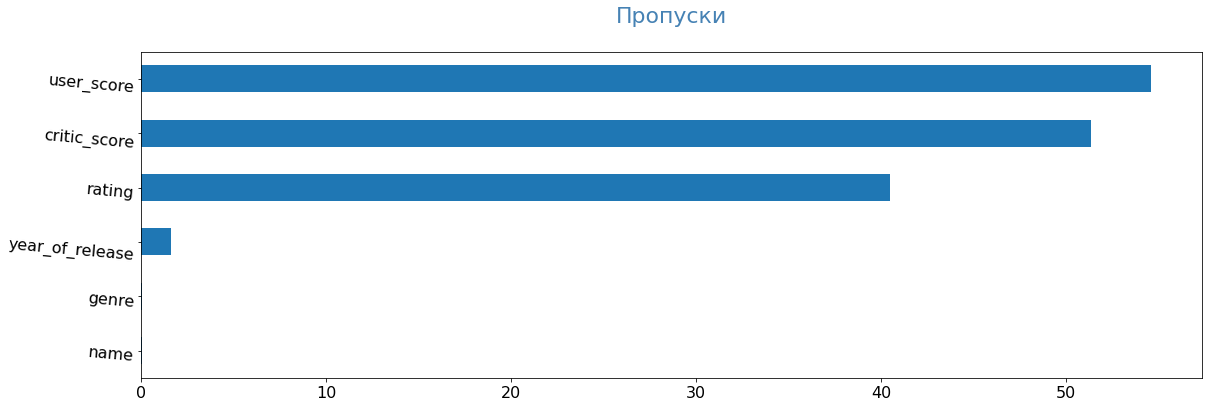

In [59]:
# check
# пропущенные значения бары
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')
pass_value_barh(data)

In [60]:
data['critic_score']=data['critic_score'].fillna(-1)
data['user_score']=data['user_score'].fillna(-1)
data['rating']=data['rating'].fillna(value='no_rating')
data = data.dropna(subset=['name', 'genre'])

Причинами, приводящими к появлению пропусков, являются невозможность получения или обработки(в т.ч. повреждение носителей информации), искажение или сокрытие информации(т.е. человеческий фактор)   
В столбцах name и genre удаляем пропущенные значения, т.к. записи не помогут решить главную задачу проекта — на основе актуальных платформ сформировать рекомендации для проведения рекламной кампании в 2017 г. и само кол-во пропусков минимально.           
Столбец year_of_release(год выпуска)-пропуски будут составлять около 1.6%, но ни медианным, ни средним значением заполнить пропуски нет возможности, оставим, как есть.     
В случае со столбцами citrus_store(ценка критиков), user_score(оценка пользователей), rating(рейтинг от организации ESRB)-пропущена почти половина оценочных значений, к возможным причинам мы можем отнести поломки в сервисах, собирающие оценки, возможно просто не происходил сбор оценок по этим играм. Заменить пропущенные значения на среднее/медиану мы не можем, тк оценка индивидуальна для каждой игры, так же, к сожалению, у нас нет возможности заменить значения на среднее/медианное, предварительно сгруппировав данные по другому столбцу, тк корреляции, между представленными данными не прослеживается.    
Но оставить пропуски в таком большом количестве нельзя- для того, чтобы не столкнуться с ошибкой, при дальнейшей работе, мы можем заменить отсутствующие значения на несуществующие оценки(к примеру, отрицательное число), в случае с рейтингом ESRB-заменить на 'no_rating'.

In [61]:
#добавим столбец с суммарными продажами во всех регионах
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [62]:
#проверим датасет на наличие простых дубликатов
#приведем содержание категориальных колонок к нижнему регистру
#удалим строки неполных дубликатов
data.duplicated().sum()
data['name'] = data['name'].str.lower()
data['platform']=data['platform'].str.lower()
data['genre']=data['genre'].str.lower()
key_cols = ['name', 'platform', 'year_of_release']
data = data.drop_duplicates(subset=key_cols, keep='first')


In [63]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


В предобработке данных: названия столбцов, содержимое категориальных колонок приведены к нижнему регистру, изменены типы данных в столбцах «оценка пользователей».     
Обработаны пропущенные значения-в столбцах citrus_score, user_score пропущенные значения заменены на несуществующую оценку(-1), а в столбце с рейтингом ESRB пропуски заменены  на 'no_rating',в столбцах name и genre удаляем пропущенные значения, т.к. записи не помогут решить главную задачу проекта.      
Проверили датасет на наличие простых дубликатов, удалив строку неполных дубликатов. 

## Исследовательский анализ данных

Text(0, 0.5, 'Количество')

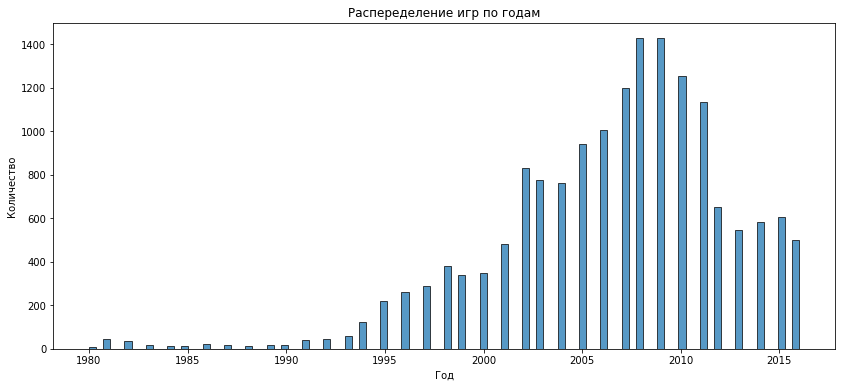

In [64]:
#посмотрим, сколько игр выпускалось за разные годы
#year_counts = data['year_of_release'].value_counts(ascending = True)
fig, ax= plt.subplots(figsize=(14,6))
sns.histplot(data['year_of_release'], bins = 100, ax=ax)
plt.title('Распеределение игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество')


Данные начиная с 1980 года, с 1995 количество выпусков игр за год начало расти, в 2002 году произошел первый скачек(почти в 2 раза) увеличилось количество игр, а максимальной популярностью игры, вероятно, пользовались в 2008-2009 годах-поэтому и выпусков за год было много(1426-1427). Начиная с 2010 года интерес к играм у пользователей ,скорее всего, начал снижаться-вместе с ним и количество выпусков в год

platform
ps2     1255.77
x360     971.42
ps3      939.64
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
3ds      259.00
xb       257.74
gb       255.46
nes      251.05
n64      218.68
snes     200.04
gc       198.93
xone     159.32
2600      96.98
wiiu      82.19
psv       54.07
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: total_sales, dtype: float64


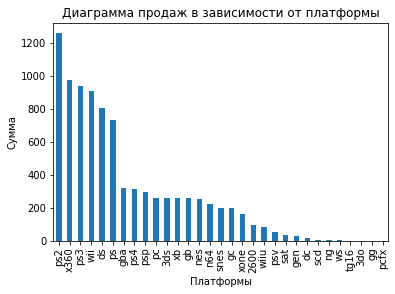

In [65]:
#посмотрим, как менялись продажи по платформам
sales_platforms=data.groupby('platform')['total_sales'].sum()
sales_platforms=sales_platforms.sort_values(ascending = False)
sales_platforms.plot.bar(title='Диаграмма продаж в зависимости от платформы', xlabel='Платформы', ylabel='Сумма')
print(sales_platforms)


Платформа с наибольшими продажами-PS2(около 1255 млн продаж), пользуются популярностью игры на X360, PS3, Wii. Меньше всего продаж у игр на платформе TG16, 3D0, GG, PCFX.

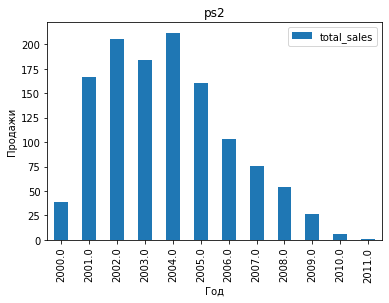

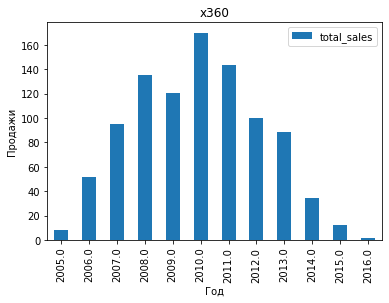

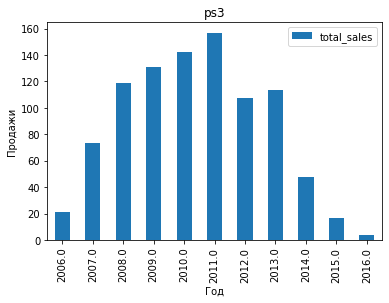

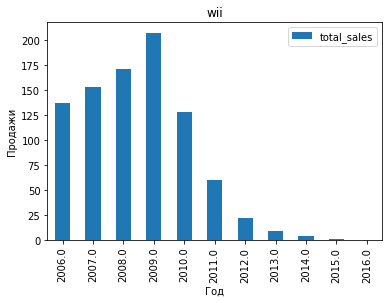

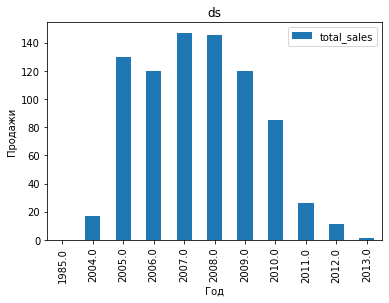

In [66]:
#построим распредления суммарных продаж самых популярных платформ по годам.(PS2,X360, PS3, Wii)
popular_platform = ['ps2','x360', 'ps3', 'wii', 'ds']
for platform in popular_platform:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar')
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Продажи')



In [67]:
# для платформы ds удалим данные за 1985 год, тк это аномалия-платформа вышла в 2004 году
filter_ds = (data['platform'] == 'ds') & (data['year_of_release'] == 1985)
data = data.drop(data[filter_ds].index)

Платформа PS2 просущестовала с 2000 по 2011 год-11 лет        
Платформа X360 просуществовала с 2005 по 2016 год-11 лет        
Платформа PS3 просуществовала с 2006 по 2016 год-10 лет        
Платформа Wii просуществовала с 2006 по 2016 год-10 лет           
Платформа DS просуществоала с 2004 года по 2013 год-9 лет            
В среднем популярная платформа живет 10 лет, после- внимание переходит на более новые платформы.

In [68]:
#За актуальный период возьмем данные, начиная с 2014 года, 
#тк компьютерные игры-динамичноменяющаяся индустрия, нам не стоит брать слишком большой период времени,
#но за 2016 год неполные данные, поэтому рассмотрим 2013, 2014, 2015, 2016
new_data = data[data['year_of_release']>=2014]
display(new_data)
print(new_data['platform'].unique())



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_rating,14.63
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014.0,role-playing,4.35,3.49,3.10,0.74,-1.0,-1.0,no_rating,11.68
77,fifa 16,ps4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015.0,shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,no_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016.0,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
16707,aiyoku no eustia,psv,2014.0,misc,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01


['ps4' '3ds' 'xone' 'wiiu' 'ps3' 'x360' 'pc' 'wii' 'psv' 'psp']


У нас остались данные о платформах: 'ps4' '3ds' 'xone' 'wiiu' 'ps3' 'x360' 'pc' 'wii' 'psv' 'psp'

<AxesSubplot:title={'center':'Диаграмма продаж в зависимости от платформы'}, xlabel='Платформы', ylabel='Сумма'>

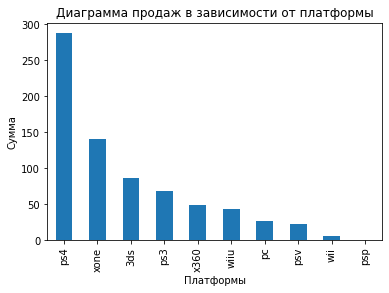

In [69]:
sales_platforms_new=new_data.groupby('platform')['total_sales'].sum()
sales_platforms_new=sales_platforms_new.sort_values(ascending = False)
sales_platforms_new.plot.bar(title='Диаграмма продаж в зависимости от платформы', xlabel='Платформы', ylabel='Сумма')

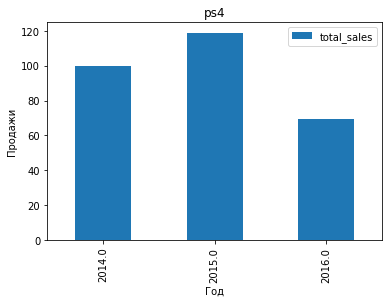

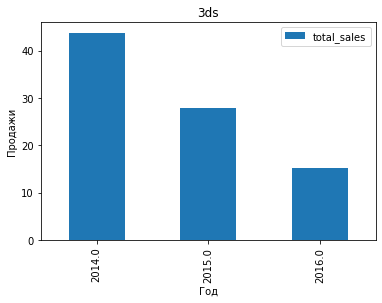

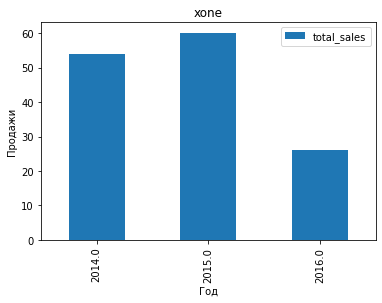

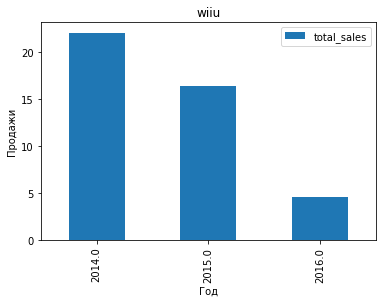

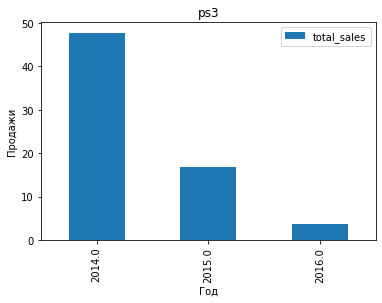

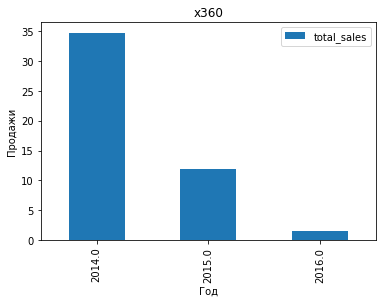

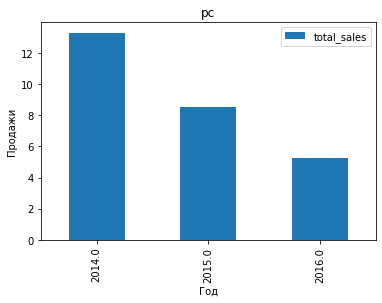

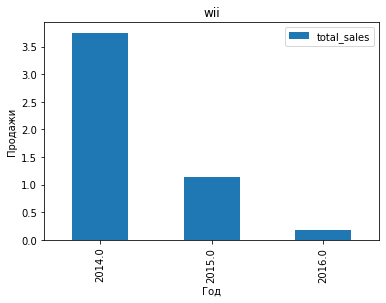

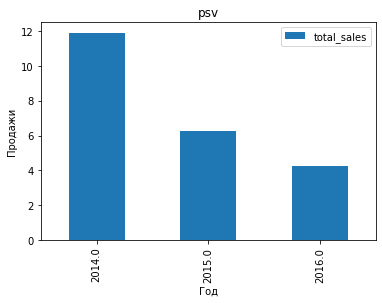

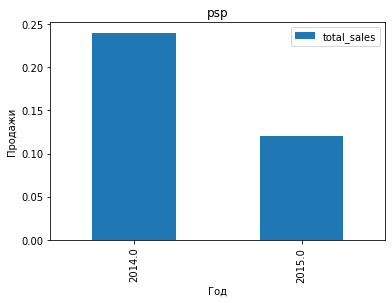

In [70]:
new_popular_platform = ['ps4', '3ds', 'xone', 'wiiu' ,'ps3', 'x360', 'pc' ,'wii' ,'psv', 'psp']
for platform in new_popular_platform:
    new_data[new_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar')
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Продажи')

По продажам лидируют платформы ps4, ps3, xone, 3ds. Ввиду того, что данные за 2016 год не полные-рассмотрим рост/падение продаж в 2014-2015 году: видим тенденцию к снижению продаж ежегодно почти в 1.5 и более раз у всех платформ, кроме ps4 и xone-можем сделать предположение, что именно эти платформы отстанутся перспективными в 2017 году, так же выгодной платформой можно счесть 3ds, тк хоть продажи и снижаются, но их объем составляет свыше 15млн копий-это значит, что есть возможность заработать на этой платформе.

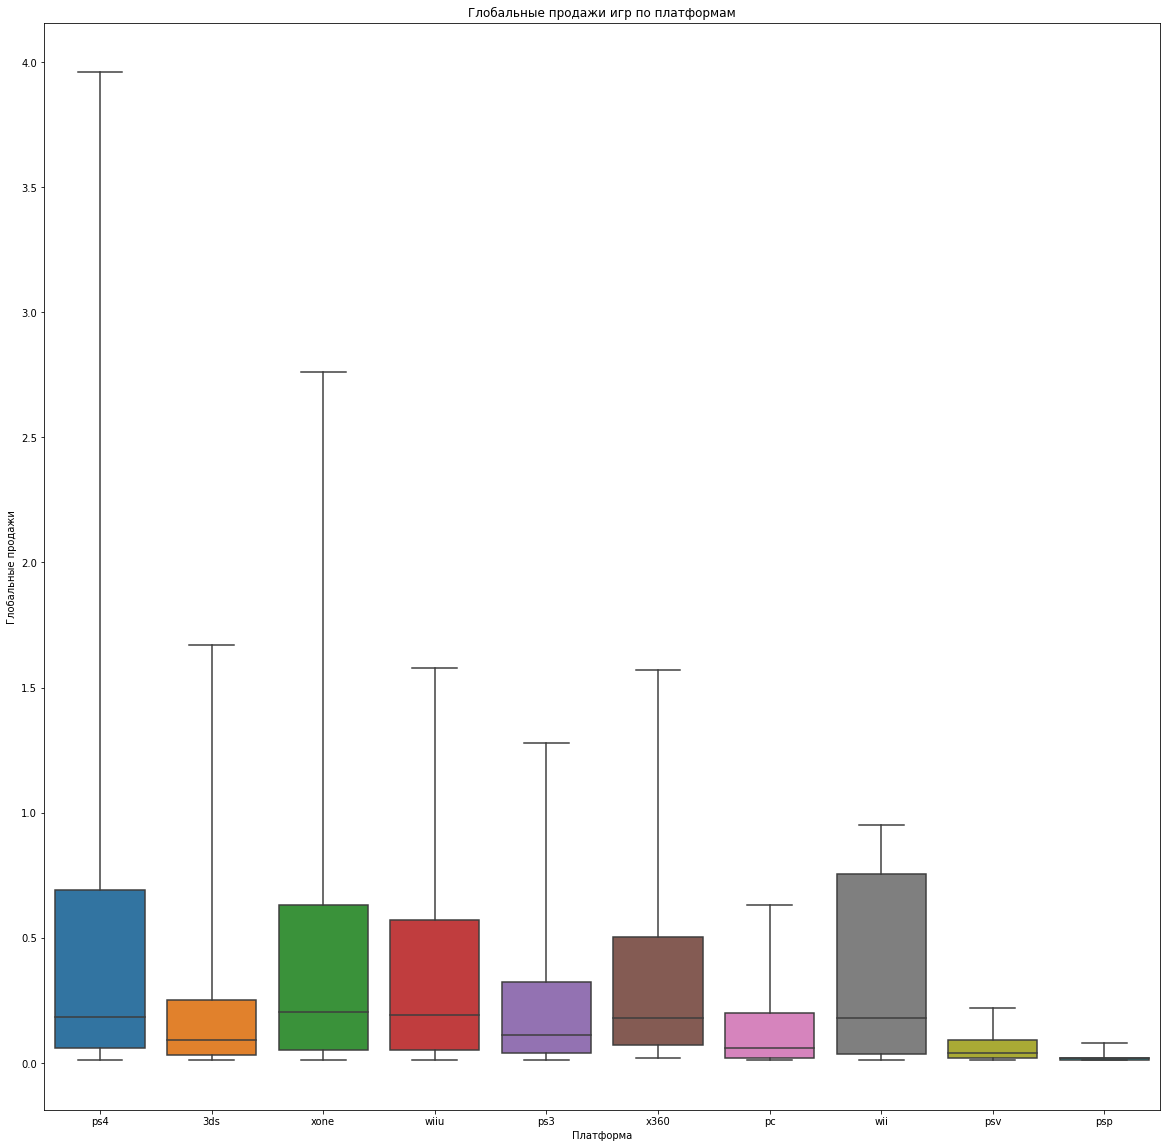

In [71]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
top_platform_group = new_data[new_data['platform'].isin(['ps4', '3ds', 'xone', 'wiiu' ,'ps3', 'x360', 'pc' ,'wii' ,'psv', 'psp'])]
plt.subplots(figsize=(20, 20))
sns.boxplot(x="platform", y="total_sales", data=top_platform_group, showfliers=False, whis=[5, 95])
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show()

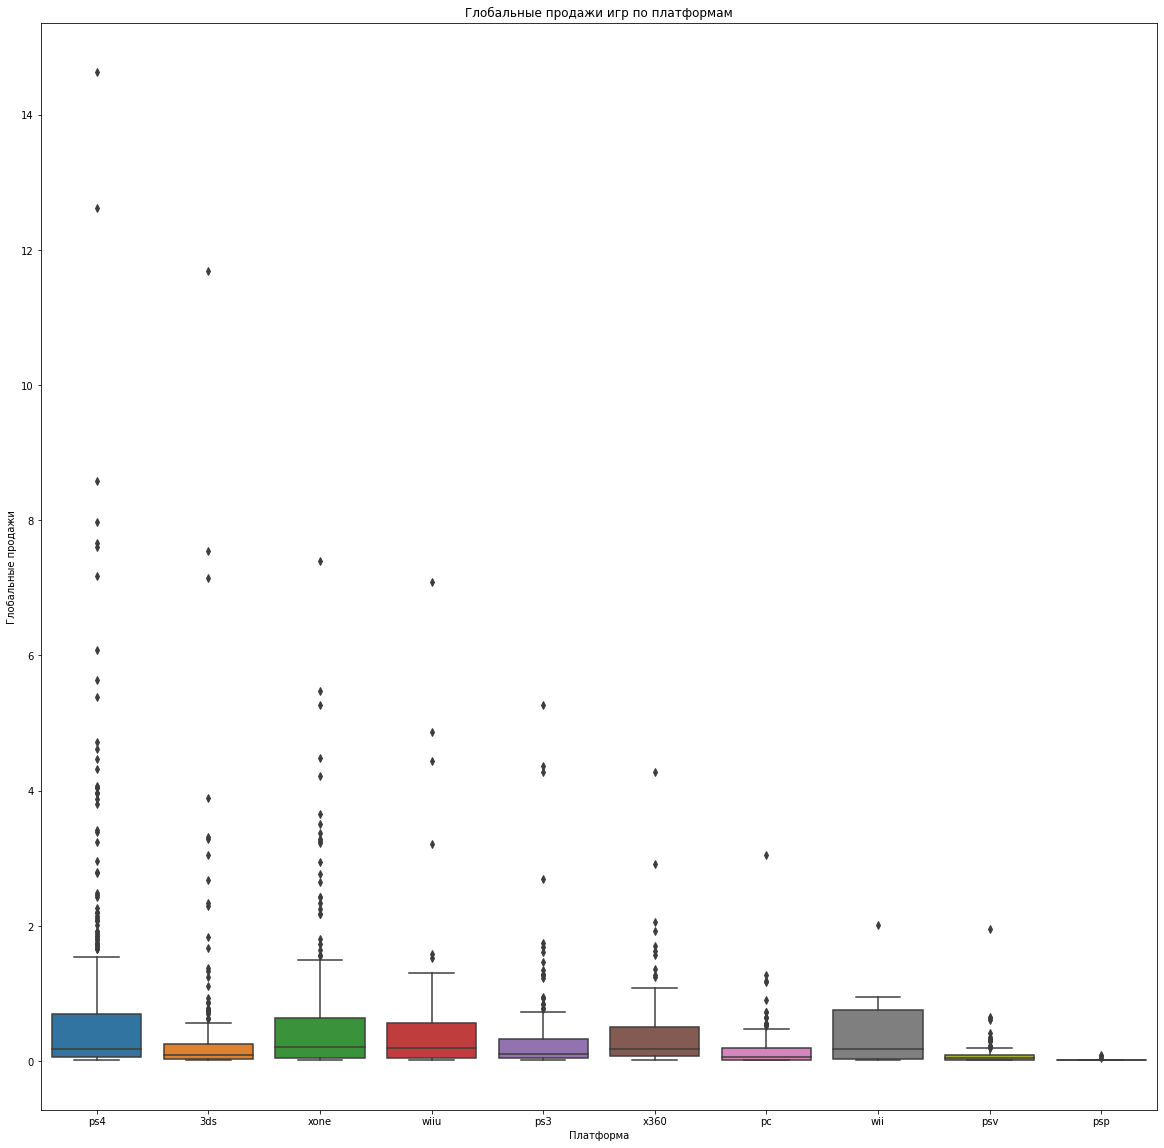

In [72]:
#добавим график в 100% масштабе, чтобы посмотреть максимальные продажи
top_platform_group = new_data[new_data['platform'].isin(['ps4', '3ds', 'xone', 'wiiu' ,'ps3', 'x360', 'pc' ,'wii' ,'psv', 'psp'])]
plt.subplots(figsize=(20, 20))
sns.boxplot(x="platform", y="total_sales", data=top_platform_group)
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.show()

Оценивая выбросы на диаграмме размаха мы выявляем платформу, которая способна выпустить наиболее привлекательные игры для игроманов: у ps4 бОльшее количество игр, принесших максимум выручки (до 13 млн копий)
Наиболее высокий уровень медианы у платформы xone- значит и самые стабильные продажи

Корреляция между отзывами пользователей и продажами: -0.04
Корреляция между отзывами критиков и продажами: 0.4


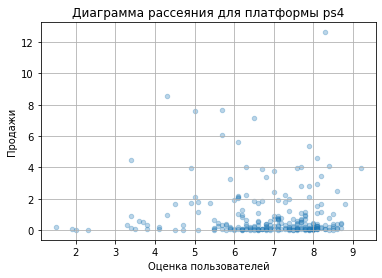

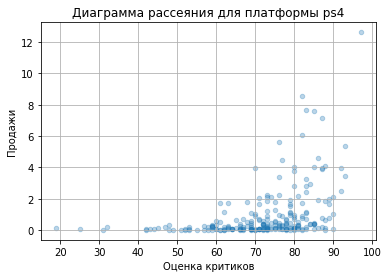

In [73]:
#посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей 
#предварительно удалив отзывы с отрицательным значением
filter_uscore_ps4 = (new_data['platform'] == 'ps4') & (new_data['user_score']<0)
new_data = new_data.drop(new_data[filter_uscore_ps4].index)
filter_cscore_ps4 = (new_data['platform'] == 'ps4') & (new_data['critic_score']<0)
new_data = new_data.drop(new_data[filter_cscore_ps4].index)

ps4_corr = new_data[new_data['platform']=='ps4']
ps4_corr.plot(x='user_score', y = 'total_sales', kind = 'scatter', alpha = 0.3, grid = True)
plt.title('Диаграмма рассеяния для платформы ps4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
print('Корреляция между отзывами пользователей и продажами:',
      round(ps4_corr['total_sales'].corr(ps4_corr['user_score']),2))
ps4_corr.plot(x='critic_score', y = 'total_sales', kind = 'scatter', alpha = 0.3, grid = True)
plt.title('Диаграмма рассеяния для платформы ps4')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
print('Корреляция между отзывами критиков и продажами:',
      round(ps4_corr['total_sales'].corr(ps4_corr['critic_score']),2))

На первой диаграмме мы видим, что есть слабая отрицательная корреляция между оценками пользователей и продажами игр (коэффициент корреляции -0.03). На второй диаграмме мы видим умеренную корреляция (коэфициент корреляции 0.4). Это может свидетельствовать о том, что оценки критиков влияют на продажи игр больше, чем оценка пользователей

Корреляция между отзывами пользователей и продажами: -0.092
Корреляция между отзывами критиков и продажами: 0.4


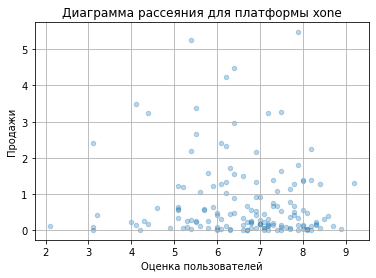

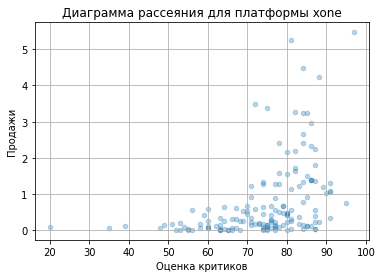

In [74]:
#посмотрим на еще нескольких платформах, как влияют на продажи отзывы пользователей и критиков
filter_uscore_xone = (new_data['platform'] == 'xone') & (new_data['user_score']<0)
new_data = new_data.drop(new_data[filter_uscore_xone].index)
filter_cscore_xone = (new_data['platform'] == 'xone') & (new_data['critic_score']<0)
new_data = new_data.drop(new_data[filter_cscore_xone].index)

corr_xone = new_data[new_data['platform']=='xone']
corr_xone.plot(x='user_score', y = 'total_sales', kind = 'scatter', alpha = 0.3, grid = True)
plt.title('Диаграмма рассеяния для платформы xone')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
print('Корреляция между отзывами пользователей и продажами:',
      round(corr_xone['total_sales'].corr(corr_xone['user_score']),3))
corr_xone.plot(x='critic_score', y = 'total_sales', kind = 'scatter', alpha = 0.3, grid = True)
plt.title('Диаграмма рассеяния для платформы xone')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
print('Корреляция между отзывами критиков и продажами:', 
      round(corr_xone['total_sales'].corr(corr_xone['critic_score']),1))



На первой диаграмме о платформе xone мы видим, слабую, почти отсутствующую взаимосвязь между оценками пользователей и продажами игр (коэффициент корреляции -0.094). На второй диаграмме мы видим, умеренную положительную корреляцию между оценками критиков и продажами (коэфициент корреляции 0.4)

Корреляция между отзывами пользователей и продажами: 0.157
Корреляция между отзывами критиков и продажами: 0.4


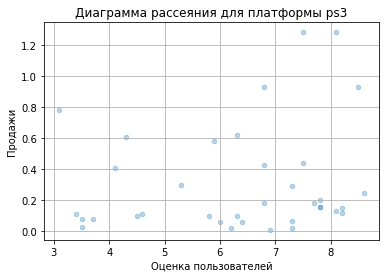

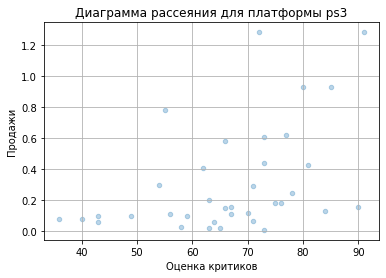

In [75]:
filter_uscore_ps3 = (new_data['platform'] == 'ps3') & (new_data['user_score']<0)
new_data = new_data.drop(new_data[filter_uscore_ps3].index)
filter_cscore_ps3 = (new_data['platform'] == 'ps3') & (new_data['critic_score']<0)
new_data = new_data.drop(new_data[filter_cscore_ps3].index)

corr_ps3 = new_data[new_data['platform']=='ps3']
corr_ps3.plot(x='user_score', y = 'total_sales', kind = 'scatter', alpha = 0.3, grid = True)
plt.title('Диаграмма рассеяния для платформы ps3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
print('Корреляция между отзывами пользователей и продажами:',
      round(corr_ps3['total_sales'].corr(corr_ps3['user_score']),3))
corr_ps3.plot(x='critic_score', y = 'total_sales', kind = 'scatter', alpha = 0.3, grid = True)
plt.title('Диаграмма рассеяния для платформы ps3')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
print('Корреляция между отзывами критиков и продажами:', 
      round(corr_ps3['total_sales'].corr(corr_ps3['critic_score']),1))

на платформе ps3 умеренная положительная корреляцию между оценками критиков и продажами(0.4), а взаимосвязь между оценками пользователей и продажами почти отсутствует(коэфициент корреляции 0.157)

Корреляция между отзывами пользователей и продажами: 0.28
Корреляция между отзывами критиков и продажами: 0.28


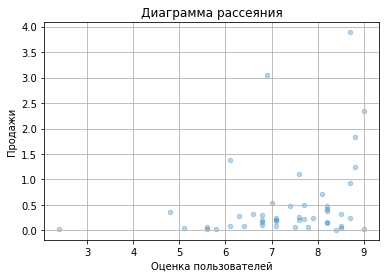

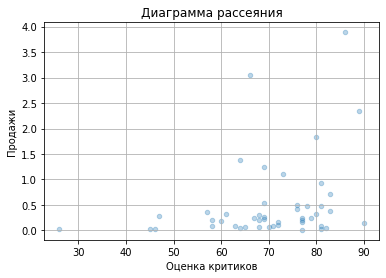

In [76]:
filter_uscore_3ds = (new_data['platform'] == '3ds') & (new_data['user_score']<0)
new_data = new_data.drop(new_data[filter_uscore_3ds].index)
filter_cscore_3ds = (new_data['platform'] == '3ds') & (new_data['critic_score']<0)
new_data = new_data.drop(new_data[filter_cscore_3ds].index)

corr_3ds = new_data[new_data['platform']=='3ds']
corr_3ds.plot(x='user_score', y = 'total_sales', kind = 'scatter', alpha = 0.3, grid = True)
plt.title('Диаграмма рассеяния')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
print('Корреляция между отзывами пользователей и продажами:', 
      round(corr_3ds['total_sales'].corr(corr_3ds['user_score']),2))
corr_3ds.plot(x='critic_score', y = 'total_sales', kind = 'scatter', alpha = 0.3, grid = True)
plt.title('Диаграмма рассеяния')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
print('Корреляция между отзывами критиков и продажами:', 
      round(corr_3ds['total_sales'].corr(corr_3ds['critic_score']),2))

На платформе 3ds на продажи отзывы критиков и пользователей влияют одинаково(коэфициент корреляции 0.28-слабая положительная корреляция)

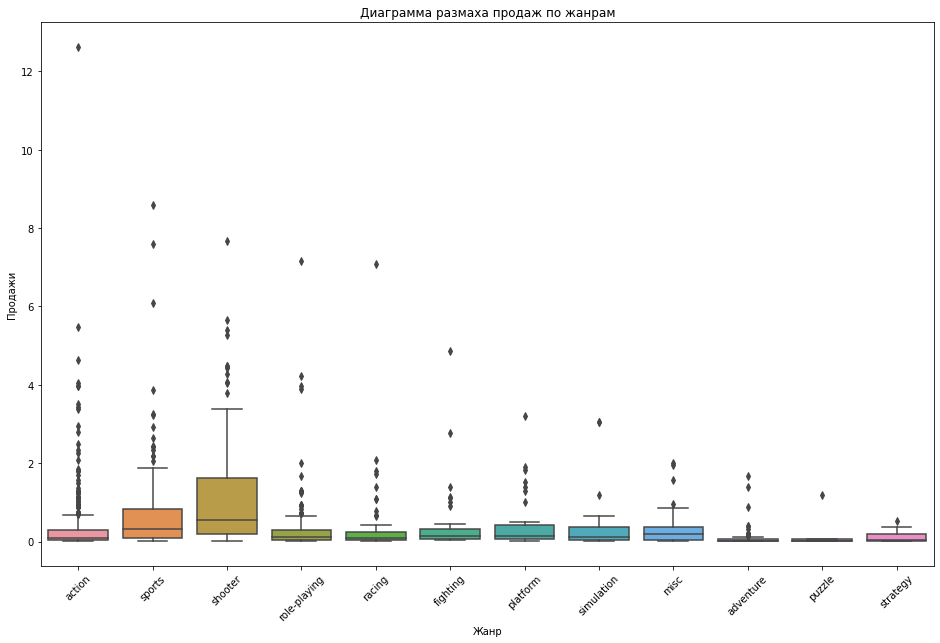

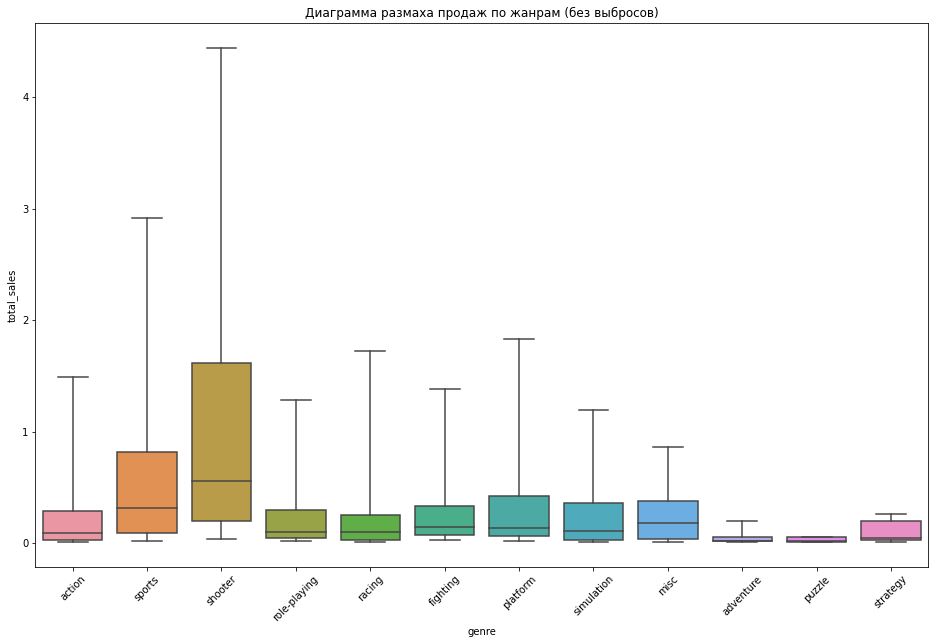

In [77]:
# распредеение по жанрам
#new_genre = new_data.pivot_table(index='genre', values='total_sales',
                                 #aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(16,10))
sns.boxplot(x='genre', y='total_sales', data= new_data)
plt.xticks(rotation =45)
plt.title('Диаграмма размаха продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')


plt.figure(figsize=(16, 10))
sns.boxplot(x='genre', y='total_sales', data=new_data,
                 showfliers=False, whis=[5, 95])
ax.set_ylabel('Продажи')
plt.xticks(rotation=45)
plt.title('Диаграмма размаха продаж по жанрам (без выбросов)')
plt.show()


Самым стабильным жанром является shooter(медиана 0.5)
Наибольшее число успешно продающихся игр у жанра action- этот жанр способен принести максимальную выручку компании.


-В среднем популярная платформа живет 10 лет, после- внимание переходит на более новые платформы.       
-Для анализа данных нам необходимо выбрать актульный период, мы возьмем данные начиная с 2014 года, тк компьютерные игры-динамичноменяющаяся индустрия, нам не стоит брать слишком большой период времени.           
-По продажам лидируют платформы ps4, ps3, xone, 3ds. Ввиду того, что данные за 2016 год не полные-рассмотрим рост/падение продаж в 2014-2015 году: видим тенденцию к снижению продаж ежегодно почти в 1.5 и более раз у всех платформ, кроме ps4 и xone-можем сделать предположение, что именно эти платформы отстанутся перспективными в 2017 году,так же выгодной платформой можно счесть 3ds, тк хоть продажи и снижаются, но их объем составляет свыше 15млн копий-это значит, что есть возможность заработать на этой платформе.                           
-Влияние на продажи имеют больше отзывы критиков, чем отзывы пользователей          
-у платформы ps4 бОльшее количество игр, принесших максимум выручки (до 13 млн копий)          
-у платформы xone самые стабильные продажи 
-самым стабильным жанром является shooter(медиана 0.5)              
-наибольшее число успешно продающихся игр у жанра action- этот жанр способен принести максимальную выручку компании.


In [78]:
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,fifa 16,ps4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,call of duty: advanced warfare,ps4,2014.0,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,fifa 17,ps4,2016.0,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,fallout 4,ps4,2015.0,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,the longest 5 minutes,psv,2016.0,action,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
16703,strawberry nauts,psv,2016.0,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
16707,aiyoku no eustia,psv,2014.0,misc,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01


## Портрет пользователя для каждого региона

In [79]:
#Определим для пользователя каждого региона (NA, EU, JP):самые популярные платформы (топ-5)
#опишем различия в долях продаж.
na_platform = new_data.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)
na_platform.reset_index(inplace=True)
na_other = na_platform[:5]
na_other = na_other.append({'platform':'other', 'na_sales': na_platform['na_sales']
                           .sum() - na_platform['na_sales'][:5].sum()}, ignore_index = True)

eu_platform = new_data.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)
eu_platform.reset_index(inplace=True)
eu_other = eu_platform[:5]
eu_other = eu_other.append({'platform':'other', 'eu_sales': eu_platform['eu_sales']
                           .sum() - eu_platform['eu_sales'][:5].sum()}, ignore_index = True)

jp_platform = new_data.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)
jp_platform.reset_index(inplace=True)
jp_other = jp_platform[:5]
jp_other = jp_other.append({'platform':'other', 'jp_sales': jp_platform['jp_sales']
                           .sum() - jp_platform['jp_sales'][:5].sum()}, ignore_index = True)

display(na_other)
display(eu_other)
display(jp_other)


,platform,na_sales
0,ps4,74.79
1,xone,66.71
2,x360,28.30
3,wiiu,19.36
4,3ds,7.80
5,other,15.97


,platform,eu_sales
0,ps4,101.69
1,xone,38.03
2,pc,17.97
3,x360,15.49
4,wiiu,13.15
5,other,15.21


,platform,jp_sales
0,psv,14.54
1,3ds,9.94
2,ps4,8.49
3,wiiu,7.31
4,ps3,1.77
5,other,0.71


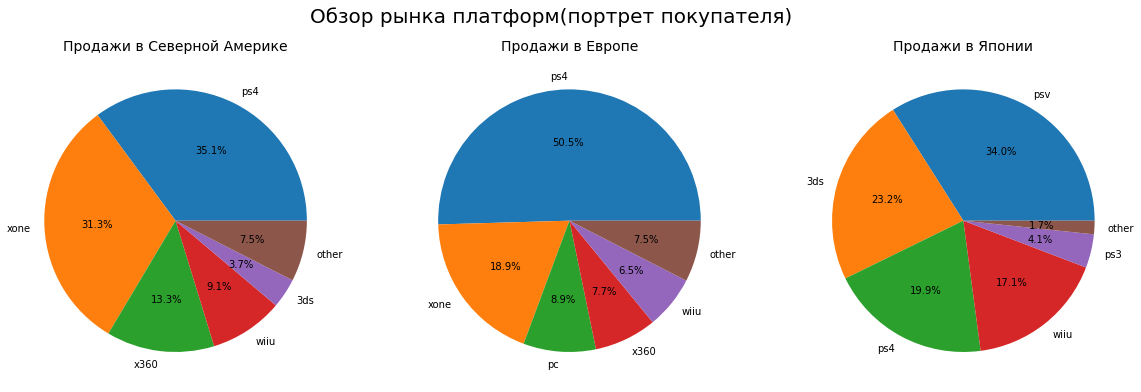

In [80]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.pie(na_other['na_sales'], labels=na_other['platform'], autopct='%1.1f%%')
ax1.set_title('Продажи в Северной Америке', fontsize=14)

ax2.pie(eu_other['eu_sales'], labels=eu_other['platform'], autopct='%1.1f%%')
ax2.set_title('Продажи в Европе', fontsize=14)

ax3.pie(jp_other['jp_sales'], labels=jp_other['platform'], autopct='%1.1f%%')
ax3.set_title('Продажи в Японии', fontsize=14)

fig.suptitle('Обзор рынка платформ(портрет покупателя)', fontsize=20, y= 0.8 )
plt.show()

В топ-5 платформ Северной Америки входят ps4(35.1%), xone(31.3%), x360(13.3%), wiiu(9.1%), 3ds(3.7%),оставшиеся платформы входят в 7.5% от общего числа платформ             
В Европе топ-5 платформ: ps4(50.5%), xone(18.9%), pc(8.9%), x360(7.7%), wiiu(6.5%), 7.5%-другие платформы      
Топ-5 платформ для Японии(34.0%)-psv, 23.2%-3ds, 19.9%-ps4, 17.1%-wiiu, 4.1%-ps3, 1.7%-другие платформы


In [89]:
#Определим для пользователя каждого региона (NA, EU, JP):самые популярные жанры (топ-5)
na_genre = new_data.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)
na_genre.reset_index(inplace=True)
na_genre_other = na_genre[:5]
na_genre_other = na_genre_other.append({'genre':'other', 'na_sales': na_genre['na_sales']
                           .sum() - na_genre['na_sales'][:5].sum()}, ignore_index = True)

eu_genre = new_data.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)
eu_genre.reset_index(inplace=True)
eu_genre_other = eu_genre[:5]
eu_genre_other = eu_genre_other.append({'genre':'other', 'eu_sales': eu_genre['eu_sales']
                           .sum() - eu_genre['eu_sales'][:5].sum()}, ignore_index = True)

jp_genre = new_data.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)
jp_genre.reset_index(inplace=True)
jp_genre_other = jp_genre[:5]
jp_genre_other = jp_genre_other.append({'genre':'other', 'jp_sales': jp_genre['jp_sales']
                           .sum() - jp_genre['jp_sales'][:5].sum()}, ignore_index = True)

display(na_genre_other)
display(eu_genre_other)
display(jp_genre_other)

,genre,na_sales
0,shooter,58.01
1,action,57.56
2,sports,40.72
3,role-playing,19.26
4,misc,8.65
5,other,28.73


,genre,eu_sales
0,action,59.11
1,shooter,46.29
2,sports,38.17
3,role-playing,17.24
4,racing,11.60
5,other,29.13


,genre,jp_sales
0,role-playing,11.85
1,action,11.18
2,shooter,3.66
3,misc,3.35
4,platform,2.57
5,other,10.15


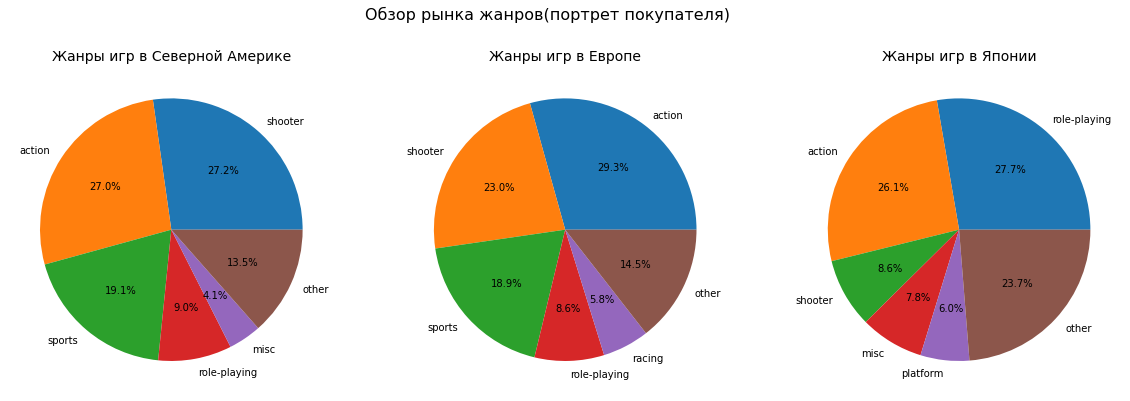

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6.5))

ax1.pie(na_genre_other['na_sales'], labels=na_genre_other['genre'], autopct='%1.1f%%')
ax1.set_title('Жанры игр в Северной Америке', fontsize=14)

ax2.pie(eu_genre_other['eu_sales'], labels=eu_genre_other['genre'], autopct='%1.1f%%')
ax2.set_title('Жанры игр в Европе', fontsize=14)

ax3.pie(jp_genre_other['jp_sales'], labels=jp_genre_other['genre'], autopct='%1.1f%%')
ax3.set_title('Жанры игр в Японии', fontsize=14)

fig.suptitle('Обзор рынка жанров(портрет покупателя)', fontsize=16)
plt.show()

В Северной Америке в топ-5 жанров входят самый популярныйshooter-(27.2%), action(27.0%), sports(19.1%), role-playing(9.0%), misc(4.1%), другие жанры-13.5%           
В Европе в топ-5 жанров состоят из Action(29.3%), Shooter(23.0%), sports(18.9%), role-playing(8.6%), racing(5.8%), другие жанры-14.5%   
В Японии в топе-5 жанров , role-playing(27.7%),action(26.1%) misc(7.8%), shooter(8.6%), platform(6.0%), другие жанры-23.7%


In [84]:
 #посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе
na_rating= pd.pivot_table(new_data, index='rating', values='na_sales',
                         aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_genre)
eu_rating= pd.pivot_table(new_data, index='rating', values='eu_sales'
                         ,aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_genre)
jp_rating= pd.pivot_table(new_data, index='rating', values='jp_sales'
                         ,aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_genre)

,genre,na_sales
0,shooter,58.01
1,action,57.56
2,sports,40.72
3,role-playing,19.26
4,misc,8.65
5,fighting,8.40
6,racing,7.75
7,platform,5.90
8,adventure,3.20
9,simulation,2.13


,genre,eu_sales
0,action,59.11
1,shooter,46.29
2,sports,38.17
3,role-playing,17.24
4,racing,11.60
5,simulation,6.71
6,misc,6.22
7,platform,5.53
8,fighting,4.79
9,adventure,3.73


,genre,jp_sales
0,role-playing,11.85
1,action,11.18
2,shooter,3.66
3,misc,3.35
4,platform,2.57
5,fighting,2.51
6,adventure,2.03
7,simulation,1.87
8,sports,1.62
9,racing,1.58


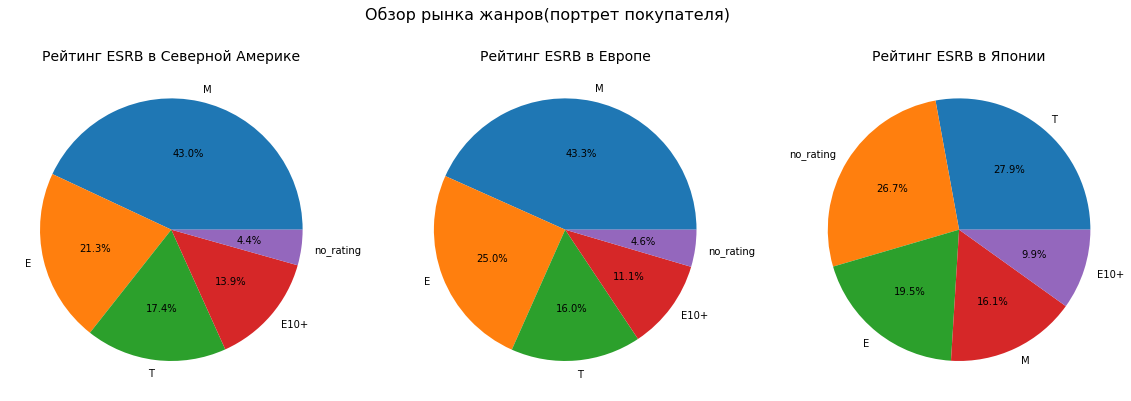

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6.5))

ax1.pie(na_rating['na_sales'], labels=na_rating.index, autopct='%1.1f%%')
ax1.set_title('Рейтинг ESRB в Северной Америке', fontsize=14)

ax2.pie(eu_rating['eu_sales'], labels=eu_rating.index, autopct='%1.1f%%')
ax2.set_title('Рейтинг ESRB в Европе', fontsize=14)

ax3.pie(jp_rating['jp_sales'], labels=jp_rating.index, autopct='%1.1f%%')
ax3.set_title('Рейтинг ESRB в Японии', fontsize=14)

fig.suptitle('Обзор рынка жанров(портрет покупателя)', fontsize=16)
plt.show()

В Северной Америке бОльшим спросом пользуются игры группы М-"для взрослых"(158млн продаж), часто покупают игры групп Е-"для всех"(73 млн), менее остальных пользователей привлекают игры не имеющие рейтинга(20.8 млн).        
В Европе так же предпочтение отдается играм "для взрослых"(138 млн), и игрым "для всех"(75 млн продаж), меньше всего внимания к играм без рейтинга(16.3млн)     
В Японии бОльшая часть купленных игр не имеет рейтинга(17.6млн(ввиду того, что в Японии есть своя организация CERO, которая классифицирует видеоигры по возрастным ограничениям для потребителей , как и ESRB, но рейтинги не всегда совпадают, так же рынок видеоигр в Японии имеет свои особенности и требования, которые могут не соответствовать западным стандартам), популярностью пользуются игры "для подростков", самые малопродающиеся игры "для всех от 10 лет и старше".


## Проверка гипотез

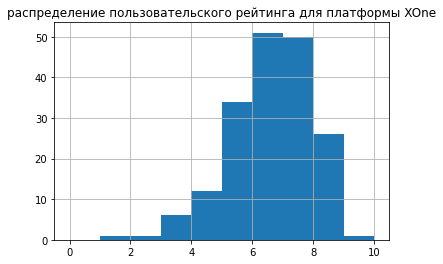

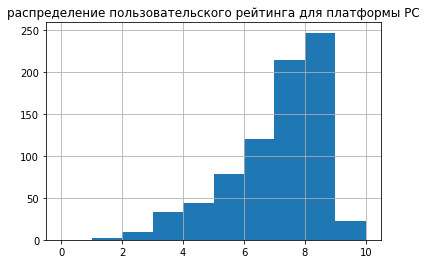

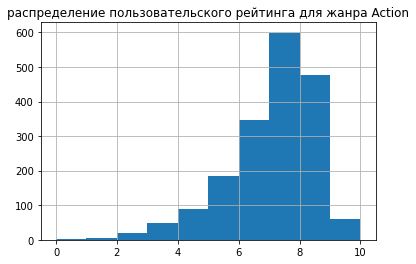

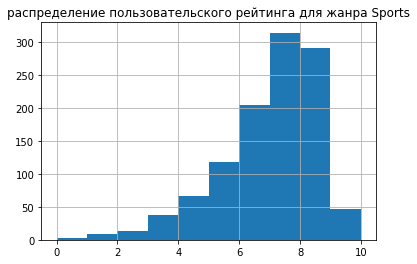

In [86]:
#проверим 2 гипотезы:
#1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
#2.Средние пользовательские рейтинги жанров Action и Sports разные.
#проверим распределение для этих групп
data[data['platform']=='xone']['user_score'].hist(range=(0,10))
plt.title('распределение пользовательского рейтинга для платформы XOne')
plt.show()
data[(data['platform'] == 'pc') & (data['user_score'] > 0)]['user_score'].hist(range=(0,10))
plt.title('распределение пользовательского рейтинга для платформы PC')
plt.show()
data[data['genre']=='action']['user_score'].hist(range=(0,10))
plt.title('распределение пользовательского рейтинга для жанра Action')
plt.show()
data[data['genre']=='sports']['user_score'].hist(range=(0,10))
plt.title('распределение пользовательского рейтинга для жанра Sports')
plt.show()
#мы можем использовать t-тест Стьюдента для независимых выборок

#гипотезы1                      
H0-средние пользовательские рейтинги для платформ XOne и PC равны                  
H1-средние пользовательсике рейтинги для платформ XOne и PC различаются                    

In [87]:
xone_score = data[(data['platform'] == 'xone') & (data['user_score'] > 0)]['user_score']
pc_score = data[(data['platform'] == 'pc') & (data['user_score'] > 0)&(data['year_of_release']>=2013)]['user_score']
results = st.ttest_ind(xone_score, pc_score, equal_var=False)
alpha = 0.05 #уровень значимости
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Средний пользовательский рейтинг для платформы XOne равен:', xone_score.mean())    
print('Средний пользовательский рейтинг для платформы PC равен:', pc_score.mean())     

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу
Средний пользовательский рейтинг для платформы XOne равен: 6.521428571428572
Средний пользовательский рейтинг для платформы PC равен: 6.2696774193548395


#гипотезы2                                  
H0-средние пользовательские рейтинги жанров Action и Sports равны            
H1-средние пользовательские рейтинги жанров Action и Sports НЕ равны

In [88]:
action_score = data[(data['genre'] == 'action') & (data['user_score'] > 0)]['user_score']
sports_score = data[(data['genre'] == 'sports') & (data['user_score'] > 0)]['user_score']
results = st.ttest_ind(action_score, sports_score, equal_var=False)
alpha = 0.05 #уровень значимости
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('Средний пользовательский рейтинг для жанра Action равен:', action_score.mean())    
print('Средний пользовательский рейтинг для жанра Sports равен:', sports_score.mean())           
        
          

p-значение: 0.12024530426190531
Не получилось отвергнуть нулевую гипотезу
Средний пользовательский рейтинг для жанра Action равен: 7.054043715846995
Средний пользовательский рейтинг для жанра Sports равен: 6.962522686025407


## Общий вывод


Исследование продаж компьютерных игр в интернет-магазине «Стримчик».       
Необходимо выявить определяющие успешность игры закономерности, нам доступны данные до 2016 года: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Нужно отработать принцип работы с данными. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
**1.Общие данные о данных.**          
В датафрейме нам представлены 16715 строк и 11 столбцов, хранящие информацию о названии игр,платформах, годах выпуска, жанре игр, продажах в Северной Америке, Европе, Японии, продажах в других странах, оценках критиков, оценках пользователей, рейтингах от организации ESRB.        
**2.Предобработка данных.**
В предобработке данных названия столбцов, содержимое категориальных колонок приведены к нижнему регистру, изменены типы данных в столбцах «оценка пользователей».
Обработаны пропущенные значения-в столбцах citrus_score, user_score пропущенные значения заменены на несуществующую оценку(-1), а в столбце с рейтингом ESRB пропуски заменены на 'no_rating',в столбцах name и genre удаляем пропущенные значения, т.к. записи не помогут решить главную задачу проекта.
Проверили датасет на наличие простых дубликатов, удалив строку неполных дубликатов.          
**3.Исследовательский анализ данных.**          
Данные ,начиная с 1980 года, с 1995 количество выпусков игр за год начало расти, в 2002 году произошел первый скачек(почти в 2 раза) увеличилось количество игр, а максимальной популярностью игры пользовались в 2008-2009 годах, поэтому и выпусков за год было много(1426-1427 млн). Начиная с 2010 года количество выпусков в год начало снижаться , скорее всего из-за снижения интереса к играм у пользователей.         
Платформой, с наибольшими продажами, можно назвать -PS2(около 1255 млн продаж), так же пользуются популярностью игры на платформах X360, PS3, Wii. Меньше всего продаж у игр на платформе TG16, 3D0, GG, PCFX. В среднем популярная платформа живет 10 лет, после- внимание переходит на более новые платформы.
-Для того чтобы выявить определяющие успешность игры закономерности, нужно выбрать актуальный период, мы выбираем период начиная с 2014 года, тк компьютерные игры-динамичноменяющаяся индустрия, нам не стоит брать слишком большой период времени.                        
-По продажам лидируют платформы ps4, ps3, xone, 3ds. Ввиду того, что данные за 2016 год не полные-рассмотрим рост/падение продаж в 2014-2015 году: видим тенденцию к снижению продаж ежегодно почти в 1.5 и более раз у всех платформ, кроме ps4 и xone-можем сделать предположение, что именно эти платформы отстанутся перспективными в 2017 году, так же выгодной платформой можно счесть 3ds, тк хоть продажи и снижаются, но их объем составляет свыше 15млн копий-это значит, что есть возможность заработать на этой платформе.          
-Влияние на продажи имеют больше отзывы критиков, чем отзывы пользователей

-у платформы ps4 бОльшее количество игр, принесших максимум выручки (до 13 млн копий)             
-у платформы xone самые стабильные продажи    
-самым стабильным жанром является shooter(медиана 0.5)                  
-наибольшее число успешно продающихся игр у жанра action- этот жанр способен принести максимальную выручку компании.

-В Северной Америке в топ-5 жанров входят самый популярныйshooter-(27.2%), action(27.0%), sports(19.1%), role-playing(9.0%), misc(4.1%), другие жанры-13.5%         
-В Европе в топ-5 жанров состоят из Action(29.3%), Shooter(23.0%), sports(18.9%), role-playing(8.6%), racing(5.8%), другие жанры-14.5%           
-В Японии в топе-5 жанров , role-playing(27.7%),action(26.1%) misc(7.8%), shooter(8.6%), platform(6.0%), другие жанры-23.7%          
          

  -Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе                    
       В Северной Америке бОльшим спросом пользуются игры группы М-"для взрослых"(158млн продаж), часто покупают игры групп Е-"для всех"(73 млн), менее остальных пользователей привлекают игры не имеющие рейтинга(20.8 млн).
В Европе так же предпочтение отдается играм "для взрослых"(138 млн), и игрым "для всех"(75 млн продаж), меньше всего внимания к играм без рейтинга(16.3млн)        
В Японии бОльшая часть купленных игр не имеет рейтинга(17.6млн(ввиду того, что в Японии есть своя организация CERO, которая классифицирует видеоигры по возрастным ограничениям для потребителей , как и ESRB, но рейтинги не всегда совпадают, так же рынок видеоигр в Японии имеет свои особенности и требования, которые могут не соответствовать западным стандартам), популярностью пользуются игры "для подростков", самые малопродающиеся игры "для всех от 10 лет и старше".                   

Полученное значение p-value говорит о том, что хотя средний чек пришедших из разных каналов и неодинаков, с вероятностью в почти 19% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.
  -проверим 2 гипотезы(будем использовать t-тест Стьюдента для независимых выборок):       
1))Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;         
Результат:         
p-значение: 0.14
Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги платформ XOne и PC одинаковые
Средний пользовательский рейтинг для платформы XOne равен: 6.5
Средний пользовательский рейтинг для платформы PC равен: 6.2        
2))Средние пользовательские рейтинги жанров Action и Sports разные.          
Результат          
p-значение: 0.12
Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые
Средний пользовательский рейтинг для жанра Action равен: 7.0
Средний пользовательский рейтинг для жанра Sports равен: 6.9        